In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2

## Exercise 15.4  (.5)

$$p(y; \theta, \phi) = exp\Big\{\frac{y\theta - b(\theta)}{\phi} - \frac{1}{2}\big[\frac{y^2}{\phi} + ln(2\pi\phi)\big]\Big\} \tag{1}$$

Using:  
$$\theta = \mu$$
$$\phi = \sigma^2$$

We can rewrite equation (1) as
$$p(y; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} exp\Big\{\frac{y\mu - \mu^2 - y^2}{2\sigma^2}\Big\}$$
$$p(y; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} exp\Big\{\frac{(y-\mu)^2}{2\sigma^2}\Big\}$$
which is the normal distribution, $\mathcal{N}(\mu, \sigma^2)$.

## Exercise 15.5 (.5)

$$p(y; \theta, \phi) = exp\Big\{\frac{y\theta - ln(1 + e^\theta)}{1/n} + ln{n \choose ny}\Big\} \tag{1}$$

Using:
$$\theta = ln\frac{\mu}{1-\mu}$$
$$\phi = 1$$

Note that:
$$e^\theta = \frac{\mu}{1-\mu}$$
so that
$$1 + e^\theta = \frac{1}{1-\mu}$$
and
$$ln(1+ e^\theta) = -ln(1-\mu)$$

We can rewrite equation (1) as
$$p(y; \mu) = {n \choose ny} exp \Big\{ \frac{y ln\frac{\mu}{1-\mu} + ln(1-\mu)}{1/n} \Big\}$$

$$p(y; \mu) = {n \choose ny} exp \Big\{ \frac{y ln\mu - yln(1-\mu) + ln(1-\mu)}{1/n} \Big\}$$

$$p(y; \mu) = {n \choose ny} exp \Big\{ ny ln\mu - nyln(1-\mu) + nln(1-\mu) \Big\}$$

$$p(y; \mu) = {n \choose ny} exp \Big\{ ny ln\mu + n(1-y)ln(1-\mu)\Big\}$$

$$p(y; \mu) = {n \choose ny} exp \Big\{ ln\mu^{ny} + ln(1-\mu)^{n(1-y)}  \Big\}$$

$$p(y; \mu) = {n \choose ny}\mu^{ny}(1-\mu)^{n(1-y)}$$


# D14.1 (2)

## Chile

In [223]:
df = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Chile.txt',
                      sep = '\s', engine='python')
df = df.loc[(df['vote']=='Y') | (df['vote']=='N')]
df = df.dropna()
df

,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2692,M,15000,F,21.0,S,35000.0,1.22231,Y
2696,M,15000,M,42.0,P,15000.0,-1.26247,N
2697,M,15000,F,28.0,P,15000.0,1.32950,Y
2698,M,15000,F,44.0,P,75000.0,1.42045,Y


In [101]:
X = pd.DataFrame(np.array([
    df['statusquo'],
    1*(df['sex']=='M'),
    1*(df['income'] > np.median(df['income'])),
    df['age']>=65,
    df['age']>30,
    1*(df['education']=='S'),
    1*(df['education']=='PS'),
    1*(df['region']=='C'),
    1*(df['region']=='M'),
    1*(df['region']=='N'),
    1*(df['region']=='S'),
]), ['statusquo', 'male', 'high-income', 'old', 'young', 'sec_edu', 'post_sec_edu',
    'region_C', 'region_M', 'region_N', 'region_S']).T
X = add_constant(X)
y = pd.DataFrame((1*(df['vote']=='Y').values)[:,None], columns=['vote'])

lr = Logit(y, X).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.206846
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                          Logit   Df Residuals:                     1691
Method:                           MLE   Df Model:                           11
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.7015
Time:                        18:41:02   Log-Likelihood:                -352.26
converged:                       True   LL-Null:                       -1180.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0906      0.311      3.504      0.000       0.481       1.701
statusquo        3.2009      0.148     21.568      0.000       2.910       3.492
male            -0.5730      0.204     -2.808      0.005      -0.973      -0.173
high-income     -0.1635      0.231     -0.707      0.480      -0.617       0.290
old             -0.1696      0.496     -0.342      0.732      -1.142       0.803
young           -0.0287      0.218     -0.132      0.895      -0.456       0.399
sec_edu         -0.6669      0.246     -2.711      0.007      -1.149      -0.185
post_sec_edu    -1.0228      0.335     -3.053      0.002      -1.680      -0.366
region_C         0.1334      0.279      0.478      0.633      -0.414       0.681
region_M         0.7764      0.580      1.338      0.181      -0.361       1.913
region_N         0.0698      0.335      0.209      0.835      -0.586       0.726
region_S        -0.1771      0.260     -0.682      0.495      -0.686       0.332
================================================================================
"""

These regressors have high p values:
- high-income
- old
- young
- region_*

so I'll drop them.

In [103]:
X = pd.DataFrame(np.array([
    df['statusquo'],
    1*(df['sex']=='M'),

    1*(df['education']=='S'),
    1*(df['education']=='PS'),

]), ['statusquo', 'male', 'sec_edu', 'post_sec_edu']).T
X = add_constant(X)
y = pd.DataFrame((1*(df['vote']=='Y').values)[:,None], columns=['vote'])

lr = Logit(y, X).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.207938
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                          Logit   Df Residuals:                     1698
Method:                           MLE   Df Model:                            4
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.6999
Time:                        18:42:22   Log-Likelihood:                -354.12
converged:                       True   LL-Null:                       -1180.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0153      0.189      5.373      0.000       0.645       1.386
statusquo        3.1689      0.145     21.886      0.000       2.885       3.453
male            -0.5742      0.202     -2.840      0.005      -0.971      -0.178
sec_edu         -0.6828      0.222     -3.079      0.002      -1.117      -0.248
post_sec_edu    -1.1074      0.291     -3.800      0.000      -1.679      -0.536
================================================================================
"""

In [104]:
X0 = np.ones(y.shape)
lr0 = Logit(y, X0).fit()
lr0.summary()

Optimization terminated successfully.
         Current function value: 0.692981
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                 1703
Model:                          Logit   Df Residuals:                     1702
Method:                           MLE   Df Model:                            0
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:               1.328e-10
Time:                        18:43:58   Log-Likelihood:                -1180.1
converged:                       True   LL-Null:                       -1180.1
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0364      0.048     -0.751      0.453      -0.131       0.059
==============================================================================
"""

Recall that the residual deviance is $$D = -2(lnL_{saturated} - lnL_{model})$$  
To compare two models, A and B, calcuate $$D_{B} - D_{A} = -2(lnL_{saturated} - lnL_{modelB}) - -2(lnL_{saturated} - lnL_{modelA}) = -2(lnL_{modelA} - lnL_{modelB})$$
Note that $$D_{B} - D_{A} \sim \chi^2_{k_{B}-k_{A}}$$
Compare the model in the variable `lr` to the baseline model in `lr0` with the difference of devices `dod = -2*(lr0.llf - lr.llf)`.

In [155]:
print (lr.llf)
print (lr0.llf)

-354.11827993612485
-1180.1474837610178


In [159]:
dod = -2*(lr0.llf - lr.llf)
print (f"D - D0 = {dod:.2f}")
k = len(lr.model.exog_names)
k0 = len(lr0.model.exog_names)
p_value = 1 - chi2.cdf(dod, k-k0)
print (f"p-value = {p_value:.4e}")

D - D0 = 1652.06
p-value = 0.0000e+00


dod is very large, so the p-value is indistinguishable from 0.

## Titanic

In [212]:
df = pd.read_csv('/Users/dsweet2/Desktop/Titanic.txt',
                      sep = '\t', engine='python')
df=df.dropna()
df

,name,survived,age,passengerClass,sex
0,"Allen, Miss Elisabeth Walton",yes,29.0000,1st,female
1,"Allison, Miss Helen Loraine",no,2.0000,1st,female
2,"Allison, Mr Hudson Joshua Creighton",no,30.0000,1st,male
3,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",no,25.0000,1st,female
4,"Allison, Master Hudson Trevor",yes,0.9167,1st,male
...,...,...,...,...,...
833,"Gronnestad, Mr Daniel Danielsen",no,32.0000,3rd,male
835,"Gustafsson, Mr Alfred Ossian",no,20.0000,3rd,male
836,"Gustafsson, Mr Anders Vilhelm",no,37.0000,3rd,male
837,"Gustafsson, Mr Johan Birger",no,28.0000,3rd,male


In [213]:
np.unique(df['passengerClass'])

array(['1st', '2nd', '3rd'], dtype=object)

In [214]:
X = pd.DataFrame(np.array([
    1*(df['passengerClass']=='1st'),
    1*(df['passengerClass']=='2nd'),
    1*(df['sex']=='male'),
    1*(df['age'] > np.median(df['age'])),
]), ['class_1', 'class_2', 'male', 'old']).T
X = add_constant(X)
y = pd.DataFrame((1*(df['survived']=='yes').values)[:,None], columns=['vote'])

lr = Logit(y, X).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.449965
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                  633
Model:                          Logit   Df Residuals:                      628
Method:                           MLE   Df Model:                            4
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:                  0.3449
Time:                        19:38:14   Log-Likelihood:                -284.83
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                 1.145e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6434      0.240      2.682      0.007       0.173       1.113
class_1        2.2089      0.305      7.236      0.000       1.611       2.807
class_2        1.1600      0.279      4.160      0.000       0.614       1.706
male          -3.0008      0.231    -12.974      0.000      -3.454      -2.548
old           -0.5433      0.232     -2.343      0.019      -0.998      -0.089
==============================================================================
"""

All of these variables have low p-values. I'll keep them all.

In [215]:
X0 = np.ones(y.shape)
lr0 = Logit(y, X0).fit()
lr0.summary()

Optimization terminated successfully.
         Current function value: 0.686844
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   vote   No. Observations:                  633
Model:                          Logit   Df Residuals:                      632
Method:                           MLE   Df Model:                            0
Date:                Mon, 19 Jul 2021   Pseudo R-squ.:               1.263e-10
Time:                        19:38:57   Log-Likelihood:                -434.77
converged:                       True   LL-Null:                       -434.77
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2253      0.080     -2.816      0.005      -0.382      -0.068
==============================================================================
"""

In [216]:
dod = -2*(lr0.llf - lr.llf)
print (f"D - D0 = {dod:.2f}")
k = len(lr.model.exog_names)
k0 = len(lr0.model.exog_names)
p_value = 1 - chi2.cdf(dod, k-k0)
print (f"p-value = {p_value:.4e}")

D - D0 = 299.89
p-value = 0.0000e+00


dod is very large, so the p-value is indistinguishable from 0.

# D15.1 (2)

In [224]:
df = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Long.txt',
                      sep = '\s+', engine='python')
df

,fem,ment,phd,mar,kid5,art
1,0,8,1.38,1,2,3
2,0,7,4.29,0,0,0
3,0,47,3.85,0,0,4
4,0,19,3.59,1,1,1
5,0,0,1.81,1,0,1
...,...,...,...,...,...,...
911,1,0,2.12,1,0,1
912,1,5,3.75,0,0,2
913,1,0,0.76,0,0,0
914,1,7,2.25,0,0,1


values of 'art': [ 0  1  2  3  4  5  6  7  8  9 10 11 12 16 19]


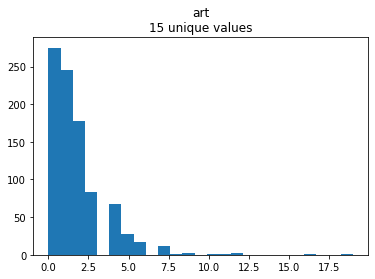

In [259]:
y = df['art']
unique_y = np.unique(y)
print ("values of 'art':", unique_y)
plt.hist(y, 25);
plt.title(f'art\n{len(unique_y)} unique values');

`art` has 15 unique values, roughly counting up from 0.

Since `art` represents a count, it's a good candidate for a Poisson-distribution GLM model, but we'll try a linear regression (a Gaussian-distribution GLM model) first, since starting simple is never a bad idea.

In [229]:
from statsmodels.api import GLM

In [230]:
df.columns

Index(['fem', 'ment', 'phd', 'mar', 'kid5', 'art'], dtype='object')

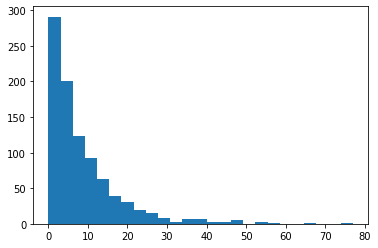

In [250]:
plt.hist(df['ment'],25);

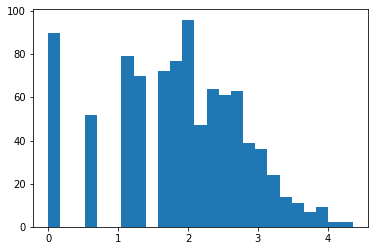

In [249]:
plt.hist(np.log(1+df['ment']),25);

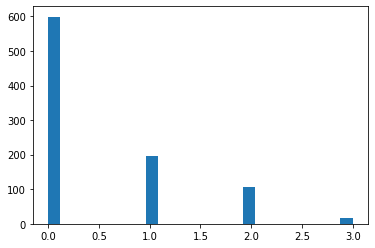

In [251]:
plt.hist(df['kid5'],25);

In [263]:
X = pd.DataFrame(np.array([
    df['phd'],
    df['fem'],
    np.log(1+df['ment']),
    df['kid5'],
    df['mar']
]), ['phd', 'female', 'ment', 'kid5', 'mar']).T
X = add_constant(X)
y = pd.DataFrame(df['art'].values[:,None], columns=['art'])

gr = GLM(y, X, family=sm.families.Gaussian()).fit()
gr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    art   No. Observations:                  915
Model:                            GLM   Df Residuals:                      909
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                          3.3331
Method:                          IRLS   Log-Likelihood:                -1846.1
Date:                Mon, 19 Jul 2021   Deviance:                       3029.8
Time:                        20:11:52   Pearson chi2:                 3.03e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8099      0.251      3.230      0.001       0.318       1.301
phd           -0.0355      0.065     -0.549      0.583      -0.162       0.091
female        -0.4080      0.128     -3.181      0.001      -0.659      -0.157
ment           0.6044      0.067      9.073      0.000       0.474       0.735
kid5          -0.2795      0.091     -3.068      0.002      -0.458      -0.101
mar            0.2869      0.146      1.968      0.049       0.001       0.573
==============================================================================
"""

`phd` doesn't seem significant

In [276]:
X = pd.DataFrame(np.array([
    df['fem'],
    np.log(1+df['ment']),
    df['kid5'],
    df['mar']
]), ['female', 'ment', 'kid5', 'mar']).T
X = add_constant(X)
y = pd.DataFrame(df['art'].values[:,None], columns=['art'])

gr = GLM(y, X, family=sm.families.Gaussian()).fit()
gr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    art   No. Observations:                  915
Model:                            GLM   Df Residuals:                      910
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          3.3305
Method:                          IRLS   Log-Likelihood:                -1846.3
Date:                Mon, 19 Jul 2021   Deviance:                       3030.8
Time:                        20:19:44   Pearson chi2:                 3.03e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7156      0.183      3.918      0.000       0.358       1.074
female        -0.4060      0.128     -3.168      0.002      -0.657      -0.155
ment           0.5934      0.063      9.348      0.000       0.469       0.718
kid5          -0.2795      0.091     -3.070      0.002      -0.458      -0.101
mar            0.2928      0.145      2.015      0.044       0.008       0.578
==============================================================================
"""

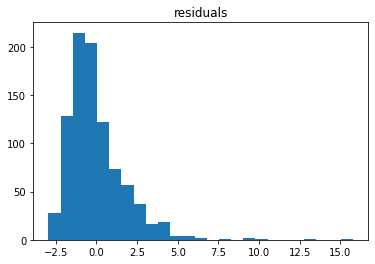

In [284]:
eps = y.values.flatten() - gr.predict(X)
plt.hist(eps,25);
plt.title('residuals');

The residuals are not quite normal-looking. They are skewed to the right. Since an ideal linear regression requires normally-distributed residuals, maybe it's worth investigating the Poisson regression.

In [285]:
grp = GLM(y, X, family=sm.families.Poisson()).fit()
grp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    art   No. Observations:                  915
Model:                            GLM   Df Residuals:                      910
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1633.6
Date:                Mon, 19 Jul 2021   Deviance:                       1599.5
Time:                        20:21:01   Pearson chi2:                 1.65e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1554      0.085     -1.837      0.066      -0.321       0.010
female        -0.2326      0.054     -4.274      0.000      -0.339      -0.126
ment           0.3681      0.028     13.030      0.000       0.313       0.423
kid5          -0.1719      0.040     -4.309      0.000      -0.250      -0.094
mar            0.1721      0.061      2.822      0.005       0.053       0.292
==============================================================================
"""

Which model is better?

You cannot directly compare the log-likelihoods (or the deviances, or the $R^2$'s, ...) of the two models, `gr` and `grp`, because the link functions and error distributions are different.  

So what do you do?


 1) To compare any two models (or, more generally, any two components of a system you are engineering), you need to create a single objective that applies to both of them.  
 
 2a) That objective should reflect the broader goal(s) of the system. What business or social need are you trying to serve? To produce revenue, induce web site clicks, autopilot a car, etc.? The way to compare the models is to measure how each performs at that task.  
 
 2b) You could also create a subobjective, like peformance on a simulation of the task on logged data. For example, you could simulate trading on historical market data using each of the models and see which makes more simulated money.


